### 환경 설정

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sqlite3
import datetime as dt
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 글꼴 설정

### SQLite에서 데이터 받기

In [3]:
con = sqlite3.connect("db/new_song.db")

df_song_info = pd.read_sql("SELECT * FROM df_song_info_NOST", con)

con.close()

df_song_info

,song_id,song_name,artist_name,album_name,release_date,genre
0,14776,All I Want For Christmas Is You,Mariah Carey,Merry Christmas (Deluxe Anniversary Edition),2019-11-01,R&B/Soul
1,1489805,Must Have Love,"SG 워너비, 브라운아이드걸스",SG워너비 & 브라운아이드걸스 싱글,2006-11-16,R&B/Soul
2,1500196,내사람,SG 워너비,The Precious History,2006-11-15,R&B/Soul
3,1615770,아리랑,SG 워너비,The Sentimental Chord,2007-04-06,R&B/Soul
4,1854856,라라라,SG 워너비,My Friend,2008-04-24,발라드
...,...,...,...,...,...,...
1040,8130796,상상더하기,라붐 (LABOUM),Fresh Adventure,2016-04-06,댄스
1041,8235260,비,폴킴,비,2016-06-21,R&B/Soul
1042,8252573,아주 NICE,세븐틴,Love&Letter Repackage Album,2016-07-04,댄스
1043,8298724,뜨거운 여름밤은 가고 남은 건 볼품없지만,잔나비,MONKEY HOTEL,2016-08-04,"인디음악, 록/메탈"


In [4]:
def insert_day(data):
    yoil=pd.Timestamp(data)
    return yoil.day_name()

day_of_week_list = []
for i in range(len(df_song_info.loc[:])):
    day_of_week = insert_day(df_song_info.loc[i][4])
    day_of_week_list.append(day_of_week)


df_song_info['day_of_week'] = day_of_week_list

df_song_info

,song_id,song_name,artist_name,album_name,release_date,genre,day_of_week
0,14776,All I Want For Christmas Is You,Mariah Carey,Merry Christmas (Deluxe Anniversary Edition),2019-11-01,R&B/Soul,Friday
1,1489805,Must Have Love,"SG 워너비, 브라운아이드걸스",SG워너비 & 브라운아이드걸스 싱글,2006-11-16,R&B/Soul,Thursday
2,1500196,내사람,SG 워너비,The Precious History,2006-11-15,R&B/Soul,Wednesday
3,1615770,아리랑,SG 워너비,The Sentimental Chord,2007-04-06,R&B/Soul,Friday
4,1854856,라라라,SG 워너비,My Friend,2008-04-24,발라드,Thursday
...,...,...,...,...,...,...,...
1040,8130796,상상더하기,라붐 (LABOUM),Fresh Adventure,2016-04-06,댄스,Wednesday
1041,8235260,비,폴킴,비,2016-06-21,R&B/Soul,Tuesday
1042,8252573,아주 NICE,세븐틴,Love&Letter Repackage Album,2016-07-04,댄스,Monday
1043,8298724,뜨거운 여름밤은 가고 남은 건 볼품없지만,잔나비,MONKEY HOTEL,2016-08-04,"인디음악, 록/메탈",Thursday


### 요일별 발매 수 그래프

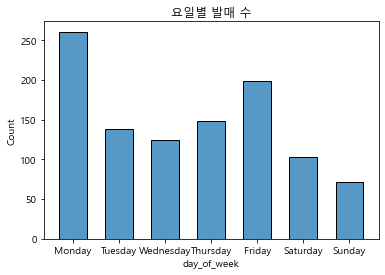

In [11]:
df_song_info_sort = df_song_info[df_song_info.columns]
df_song_info_sort['week_index'] = pd.to_datetime(df_song_info_sort['release_date']).dt.weekday
df_song_info_sort['week_index'] = df_song_info_sort['week_index'].astype(str)
df_song_info_sort = df_song_info_sort.sort_values(by = 'week_index', axis = 0)

plt.title('요일별 발매 수')
g1=sns.histplot(df_song_info_sort.day_of_week,shrink=.6)
plt.show()

### 데이터 처리

In [ ]:
plt.title('월별 장르 수')
g1=sns.histplot(df_song_info_sort.day_of_week,shrink=.6)
plt.show()

In [16]:
df_song_info['release_date'] = pd.to_datetime(df_song_info['release_date'])

In [17]:
df_song_info['month'] = df_song_info['release_date'].dt.month
df_song_info

,song_id,song_name,artist_name,album_name,release_date,genre,day_of_week,month
0,14776,All I Want For Christmas Is You,Mariah Carey,Merry Christmas (Deluxe Anniversary Edition),2019-11-01,R&B/Soul,Friday,11
1,1489805,Must Have Love,"SG 워너비, 브라운아이드걸스",SG워너비 & 브라운아이드걸스 싱글,2006-11-16,R&B/Soul,Thursday,11
2,1500196,내사람,SG 워너비,The Precious History,2006-11-15,R&B/Soul,Wednesday,11
3,1615770,아리랑,SG 워너비,The Sentimental Chord,2007-04-06,R&B/Soul,Friday,4
4,1854856,라라라,SG 워너비,My Friend,2008-04-24,발라드,Thursday,4
...,...,...,...,...,...,...,...,...
1040,8130796,상상더하기,라붐 (LABOUM),Fresh Adventure,2016-04-06,댄스,Wednesday,4
1041,8235260,비,폴킴,비,2016-06-21,R&B/Soul,Tuesday,6
1042,8252573,아주 NICE,세븐틴,Love&Letter Repackage Album,2016-07-04,댄스,Monday,7
1043,8298724,뜨거운 여름밤은 가고 남은 건 볼품없지만,잔나비,MONKEY HOTEL,2016-08-04,"인디음악, 록/메탈",Thursday,8


In [29]:
df_genre_count = df_song_info['genre'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df_genre_count

,unique_values,counts
0,발라드,284
1,랩/힙합,223
2,댄스,221
3,R&B/Soul,122
4,POP,39
5,록/메탈,38
6,"발라드, 인디음악",27
7,"인디음악, 포크/블루스",18
8,"인디음악, 록/메탈",17
9,"랩/힙합, 인디음악",12


In [35]:
df_genre_count_2 = df_genre_count.iloc[[0, 1, 2, 3, 4, 5]]
genre_list = list(df_genre_count_2['unique_values'])
print(genre_list)
print(len(genre_list))

['발라드', '랩/힙합', '댄스', 'R&B/Soul', 'POP', '록/메탈']
6


In [47]:
df_song_info

,song_id,song_name,artist_name,album_name,release_date,genre,day_of_week,month
0,14776,All I Want For Christmas Is You,Mariah Carey,Merry Christmas (Deluxe Anniversary Edition),2019-11-01,R&B/Soul,Friday,11
1,1489805,Must Have Love,"SG 워너비, 브라운아이드걸스",SG워너비 & 브라운아이드걸스 싱글,2006-11-16,R&B/Soul,Thursday,11
2,1500196,내사람,SG 워너비,The Precious History,2006-11-15,R&B/Soul,Wednesday,11
3,1615770,아리랑,SG 워너비,The Sentimental Chord,2007-04-06,R&B/Soul,Friday,4
4,1854856,라라라,SG 워너비,My Friend,2008-04-24,발라드,Thursday,4
...,...,...,...,...,...,...,...,...
1040,8130796,상상더하기,라붐 (LABOUM),Fresh Adventure,2016-04-06,댄스,Wednesday,4
1041,8235260,비,폴킴,비,2016-06-21,R&B/Soul,Tuesday,6
1042,8252573,아주 NICE,세븐틴,Love&Letter Repackage Album,2016-07-04,댄스,Monday,7
1043,8298724,뜨거운 여름밤은 가고 남은 건 볼품없지만,잔나비,MONKEY HOTEL,2016-08-04,"인디음악, 록/메탈",Thursday,8


In [54]:
con1 = df_song_info['genre'] == genre_list[0]
con2 = df_song_info['genre'] == genre_list[1]
con3 = df_song_info['genre'] == genre_list[2]
con4 = df_song_info['genre'] == genre_list[3]
con5 = df_song_info['genre'] == genre_list[4]
con6 = df_song_info['genre'] == genre_list[5]

df_song_info_genre = df_song_info.loc[con1 | con2 | con3 | con4 | con5 | con6]
df_song_info_genre

,song_id,song_name,artist_name,album_name,release_date,genre,day_of_week,month
0,14776,All I Want For Christmas Is You,Mariah Carey,Merry Christmas (Deluxe Anniversary Edition),2019-11-01,R&B/Soul,Friday,11
1,1489805,Must Have Love,"SG 워너비, 브라운아이드걸스",SG워너비 & 브라운아이드걸스 싱글,2006-11-16,R&B/Soul,Thursday,11
2,1500196,내사람,SG 워너비,The Precious History,2006-11-15,R&B/Soul,Wednesday,11
3,1615770,아리랑,SG 워너비,The Sentimental Chord,2007-04-06,R&B/Soul,Friday,4
4,1854856,라라라,SG 워너비,My Friend,2008-04-24,발라드,Thursday,4
...,...,...,...,...,...,...,...,...
1038,8111603,HandClap,Fitz & The Tantrums,Fitz and The Tantrums (Deluxe Edition),2017-07-24,POP,Monday,7
1040,8130796,상상더하기,라붐 (LABOUM),Fresh Adventure,2016-04-06,댄스,Wednesday,4
1041,8235260,비,폴킴,비,2016-06-21,R&B/Soul,Tuesday,6
1042,8252573,아주 NICE,세븐틴,Love&Letter Repackage Album,2016-07-04,댄스,Monday,7


### 월별 장르 선호도 그래프 

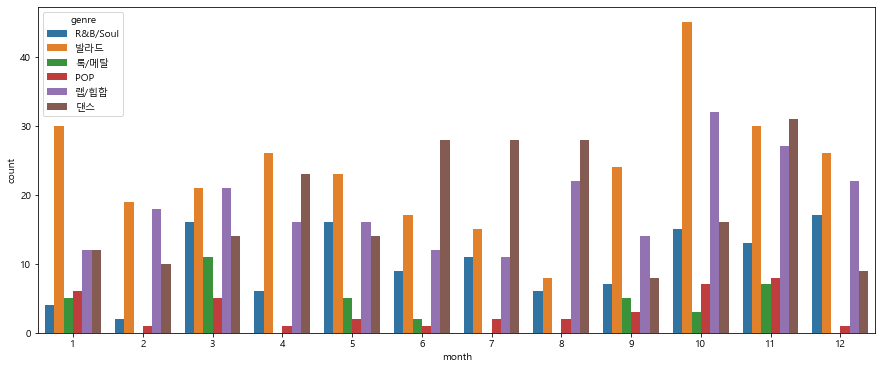

In [56]:
plt.figure(figsize=(15,6)) # 그림 크기

sns.countplot(x = 'month', hue = 'genre', data = df_song_info_genre)
plt.show()

In [57]:
con1 = df_song_info['genre'] == genre_list[0]
con2 = df_song_info['genre'] == genre_list[1]
con3 = df_song_info['genre'] == genre_list[2]
con4 = df_song_info['genre'] == genre_list[3]


df_song_info_genre2 = df_song_info.loc[con1 | con2 | con3 | con4 ]
df_song_info_genre2

,song_id,song_name,artist_name,album_name,release_date,genre,day_of_week,month
0,14776,All I Want For Christmas Is You,Mariah Carey,Merry Christmas (Deluxe Anniversary Edition),2019-11-01,R&B/Soul,Friday,11
1,1489805,Must Have Love,"SG 워너비, 브라운아이드걸스",SG워너비 & 브라운아이드걸스 싱글,2006-11-16,R&B/Soul,Thursday,11
2,1500196,내사람,SG 워너비,The Precious History,2006-11-15,R&B/Soul,Wednesday,11
3,1615770,아리랑,SG 워너비,The Sentimental Chord,2007-04-06,R&B/Soul,Friday,4
4,1854856,라라라,SG 워너비,My Friend,2008-04-24,발라드,Thursday,4
...,...,...,...,...,...,...,...,...
1036,711627,죄와벌,SG 워너비,살다가,2005-03-23,발라드,Wednesday,3
1040,8130796,상상더하기,라붐 (LABOUM),Fresh Adventure,2016-04-06,댄스,Wednesday,4
1041,8235260,비,폴킴,비,2016-06-21,R&B/Soul,Tuesday,6
1042,8252573,아주 NICE,세븐틴,Love&Letter Repackage Album,2016-07-04,댄스,Monday,7


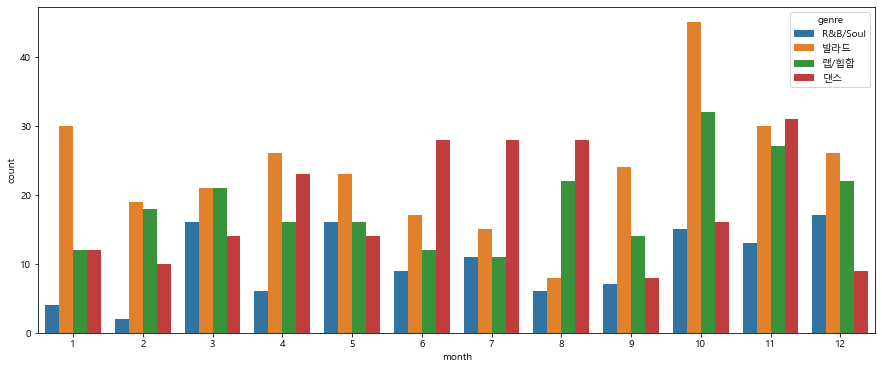

In [58]:
plt.figure(figsize=(15,6)) # 그림 크기

sns.countplot(x = 'month', hue = 'genre', data = df_song_info_genre2)
plt.show()

In [59]:
balad = df_song_info['genre'] == genre_list[0]
hiphop = df_song_info['genre'] == genre_list[1]
dance = df_song_info['genre'] == genre_list[2]

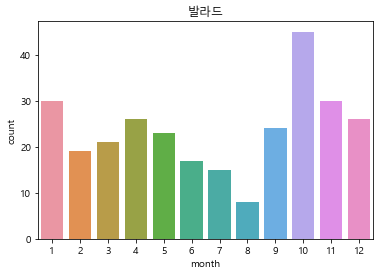

In [64]:
df_song_info_balad = df_song_info.loc[balad]

plt.title("발라드")
sns.countplot(x = 'month', data = df_song_info_balad)
plt.show()

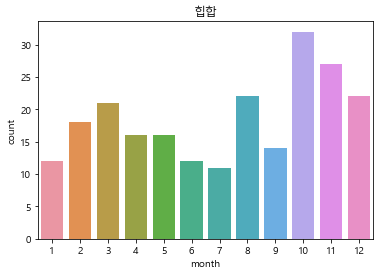

In [65]:
df_song_info_hiphop = df_song_info.loc[hiphop]

plt.title("힙합")
sns.countplot(x = 'month', data = df_song_info_hiphop)
plt.show()

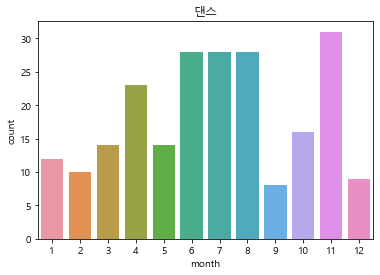

In [66]:
df_song_info_dance = df_song_info.loc[dance]

plt.title("댄스")
sns.countplot(x = 'month', data = df_song_info_dance)
plt.show()

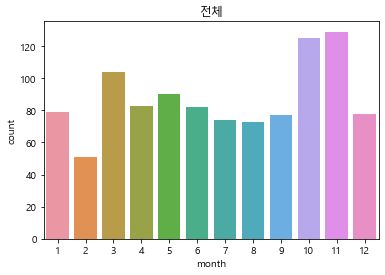

In [67]:
plt.title("전체")
sns.countplot(x = 'month', data = df_song_info)
plt.show()